# Metropolis Hastings Algorithm

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
import math

In [133]:
df = pd.read_csv('airconditioner.csv')
df

,Week,air conditioner: (Worldwide)
0,2015-01-04,12
1,2015-01-11,11
2,2015-01-18,11
3,2015-01-25,10
4,2015-02-01,9
...,...,...
256,2019-12-01,16
257,2019-12-08,16
258,2019-12-15,18
259,2019-12-22,16


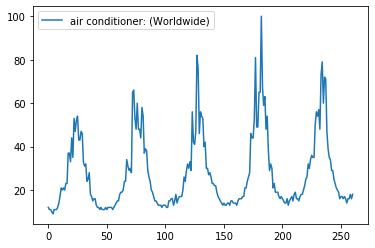

In [134]:
df = df.drop(['Week'], axis=1)
df.plot()

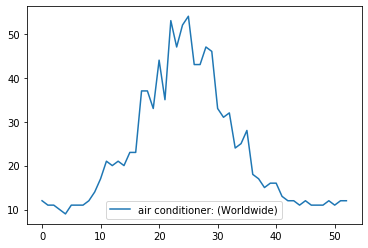

In [135]:
one_year = df.head(53)
one_year.plot()

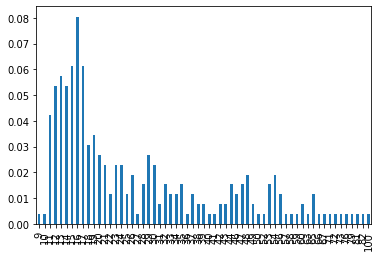

In [136]:
# gamma distribution
freq_all_years = df['air conditioner: (Worldwide)'].value_counts()
freq_all_years = freq_all_years.sort_index()
freq_all_years = freq_all_years/261
freq_all_years.plot(kind = 'bar')


In [144]:
#Markov chain part
def proposal_distribution(x): 
    return np.random.normal(x,[5,0.05],(2,))

def prior(w):
    if(w[0]<=0 or w[1] <=0):
        return 0
    else:
        return 1
    
def manual_log_lik_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_lik_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data))) 


def transition_density_ratio(x,y):
    q = (1/math.sqrt(2 * math.pi)) * (0.5 * ((y - x)**2))
    q1 = q = (1/math.sqrt(2 * math.pi)) * (0.5 * ((x - y)**2))
    return q/q1


#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
#     print('Acceptance:',x, x_new)
    if ((x_new.item() * transition_density_ratio(x.item(),x_new.item()))>x.item()):
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        if (accept < (np.exp(x_new.item()-x.item()))):
            return True
        else:
            return False
#         return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood,prior, transition_model, param_init,iterations,data,acceptance_rule):
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  proposal_distribution(x)    
        x_lik = likelihood(x,data)
        x_new_lik = likelihood(x_new,data) 
        print(acceptance_rule(x_lik + np.log(prior(x)), x_new_lik+np.log(prior(x_new))))
        if (acceptance_rule(x_lik + np.log(prior(x)), x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            print("---",x)
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

In [145]:
activity = df.loc[np.random.randint(0, 250, 100)]
# accepted, _ = metropolis_hastings(manual_log_lik_gamma,prior,transition_model,[4, 10], 50,activity,acceptance)
accepted, _ = metropolis_hastings(log_lik_gamma,prior,transition_model,[4, 10], 500,activity,acceptance)


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log


False
False
False
False
False
True
--- [ 3.39906889 10.00906973]
False
True
--- [2.76794682 9.98603588]
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
--- [2.89861609 9.85497388]
False
False
False
False
False
False
True
--- [2.62785676 9.8444759 ]
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--- [2.8121869  9.83895256]
False
False
False
False
False
False
False
False
False
False
False
--- [2.55926023 9.88504182]
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fa

In [148]:
accepted

array([[ 3.39906889, 10.00906973],
       [ 2.76794682,  9.98603588],
       [ 2.89861609,  9.85497388],
       [ 2.62785676,  9.8444759 ],
       [ 2.8121869 ,  9.83895256],
       [ 2.55926023,  9.88504182],
       [ 2.54390743,  9.8696399 ],
       [ 2.51899051,  9.99897934],
       [ 2.55022434, 10.04632992],
       [ 2.88055195, 10.09210333],
       [ 2.91030955, 10.11596452],
       [ 2.51978346, 10.1406389 ],
       [ 2.44182589, 10.15148415],
       [ 2.84481878, 10.1445377 ],
       [ 2.64516439, 10.04083448],
       [ 2.73422132, 10.0729994 ],
       [ 2.68058092, 10.09384108],
       [ 2.54286732, 10.04098942],
       [ 2.70149257, 10.08661646]])

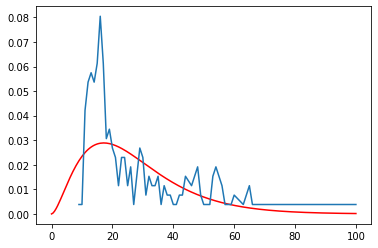

In [149]:
x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, a=accepted[-1][0], scale=accepted[-1][1])
plt.plot(x, y1,color = 'r')
plt.plot(freq_all_years)
plt.show()